# Plot meta data 

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.lines as mlines
import sys
import importlib

module_path = 'C:/Users/lissn/Thesis/code/functions'
sys.path.append(module_path)
import plot_func as pf
importlib.reload(pf)

<module 'plot_func' from 'C:\\Users/lissn/Thesis/code/functions\\plot_func.py'>

In [15]:
# Load data
radar_path = 'C:/Users/lissn/Thesis/data/meta_data/radar_meta_data.csv' 
#station_path = 'C:/Users/lissn/Thesis/data/meta_data/station_meta_data.csv' 
station_path = 'C:/Users/lissn/Thesis/data/meta_data/SVK_stationsliste.txt' 
radar_df = pd.read_csv(radar_path)
station_df = pd.read_csv(station_path,  sep=' ', index_col=False)
station_df.head()

,05Nr,Statno,Stationsnavn,Startdato,Slutdato,Lat,Long,Northings,Eastings,Højde,U-Værdi,ÅMN
0,5012,20061,HJØRRING,1979-01-01,1982-11-30,57.44,10.01,6366362,560698,25.0,8.6,8.6
1,5025,20097,FREDERIKSHAVN_MATERIELGÅRD,1990-04-19,2005-11-09,57.45,10.49,6368352,589564,18.0,0.0,0.0
2,5025,20097,FREDERIKSHAVN_MATERIELGÅRD,2008-04-22,NaN,57.45,10.49,6368352,589564,18.0,0.0,0.0
3,5027,20099,FREDERIKSHAVN_CENTRALRENSEANLÆG,1990-04-24,NaN,57.43,10.53,6365840,591625,2.0,0.0,0.0
4,5032,27011,LÆSØ_SV,1990-01-12,1996-05-31,57.26,10.90,6348363,614518,3.0,0.0,0.0


In [16]:
station_df = station_df[station_df['Slutdato'].isna()]
station_df.head()

,05Nr,Statno,Stationsnavn,Startdato,Slutdato,Lat,Long,Northings,Eastings,Højde,U-Værdi,ÅMN
2,5025,20097,FREDERIKSHAVN_MATERIELGÅRD,2008-04-22,NaN,57.45,10.49,6368352,589564,18.0,0.0,0.0
3,5027,20099,FREDERIKSHAVN_CENTRALRENSEANLÆG,1990-04-24,NaN,57.43,10.53,6365840,591625,2.0,0.0,0.0
5,5045,20212,VODSKOV,2000-05-25,NaN,57.10,10.02,6328973,562047,6.0,0.0,0.0
7,5047,20211,SULSTED_STOKBROVEJ_PUMPEST.,1998-03-20,NaN,57.17,9.96,6336906,557766,9.0,0.0,0.0
8,5049,20298,GISTRUP,1999-09-30,NaN,57.00,10.00,6317424,560707,6.0,0.0,0.0


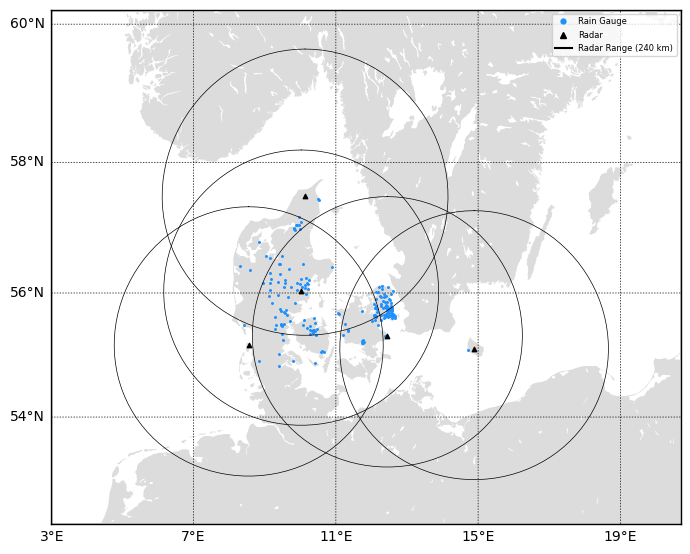

: 

In [22]:
# Create a new figure
plt.figure(figsize=(7, 7))
#plt.figure(constrained_layout=True)

# Define latitude and longitude boundaries for Denmark
llcrnrlat = 52.2    # lower latitude
urcrnrlat = 60.2   # upper latitude
llcrnrlon = 3.0      # lower longitude
urcrnrlon = 20.7     # upper longitude

# Create a Basemap instance focused on Denmark
m = Basemap(projection='merc', llcrnrlat=llcrnrlat, urcrnrlat=urcrnrlat, llcrnrlon=llcrnrlon, urcrnrlon=urcrnrlon, lat_ts=0, resolution='h')

# Draw coastlines, countries, and states
#m.drawcoastlines()
#m.drawcountries()
#m.drawstates()
m.drawmapboundary(fill_color='white') 
m.fillcontinents(color='gainsboro',lake_color='white')

# Draw parallels and meridians
parallels = np.arange(50., 62., 2.)  
m.drawparallels(parallels, labels=[True, False, False, False],dashes=[2,2], linewidth=0.5)  
meridians = np.arange(3., 21., 4.)  
m.drawmeridians(meridians, labels=[False, False, False, True],dashes=[2,2], linewidth=0.5)

# Loop through the data and plot each point, adding a label
for idx, row in station_df.iterrows():
    x, y = m(row['Long'], row['Lat'])
    m.scatter(x, y, marker='.', color='dodgerblue', zorder=5, s = 5, alpha = 1)
    #plt.text(x, y, row['05Nr'], fontsize=5, ha='right', va='bottom')

# Add radars and circle 
for idx, row in radar_df.iterrows():
    x, y = m(row['Longitude'], row['Latitude'])
    m.scatter(x, y, marker="^", color='black', zorder=5, s = 10)
    #plt.text(x, y, row['Name'], fontsize=8, ha='right', va='bottom', zorder = 10)
    # Draw a circle of 240 km radius
    pf.draw_circle(m, row['Longitude'], row['Latitude'], 240)

# Add legend
station_marker = mlines.Line2D([], [], color='dodgerblue', marker='o', linestyle='None',
                               markersize=5, label='Rain Gauge')
radar_marker = mlines.Line2D([], [], color='black', marker='^', linestyle='None',
                             markersize=7, label='Radar')
radar_reach = mlines.Line2D([], [], color='black', marker=None, linestyle='-',
                            markersize=10, label='Radar Range (240 km)')
plt.legend(handles=[station_marker, radar_marker, radar_reach], loc='upper right', fontsize=6, markerscale=0.7)
plt.tight_layout()
#plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
#plt.savefig('C:/Users/lissn/Thesis/figures/' + 'meta_data.png')
plt.savefig('C:/Users/lissn/Thesis/figures/' + 'meta_data.png', bbox_inches='tight', pad_inches=0.01, dpi = 300)
plt.show()

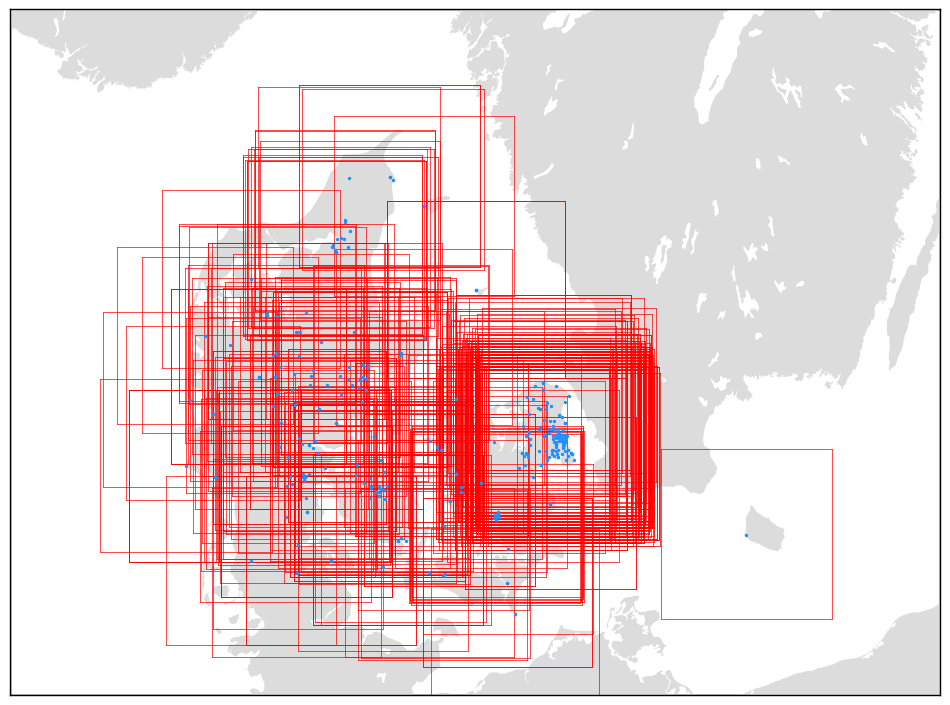

In [56]:
import math 

# Create a new figure
plt.figure(figsize=(12, 12))

# Define latitude and longitude boundaries for Denmark
llcrnrlat = 54   # lower latitude
urcrnrlat = 58.5     # upper latitude
llcrnrlon = 6      # lower longitude
urcrnrlon = 17     # upper longitude

# Create a Basemap instance focused on Denmark
m = Basemap(projection='merc', llcrnrlat=llcrnrlat, urcrnrlat=urcrnrlat, llcrnrlon=llcrnrlon, urcrnrlon=urcrnrlon, lat_ts=0, resolution='h')

# Draw coastlines, countries, and states
m.drawmapboundary(fill_color='white') 
m.fillcontinents(color='gainsboro',lake_color='white')

# Loop through the data and plot each point, adding a label
for idx, row in station_df.iterrows():
    x, y = m(row['Long'], row['Lat'])
    m.scatter(x, y, marker='o', color='dodgerblue', zorder=5, s = 2)
    #plt.text(x, y, row['05Nr'], fontsize=5, ha='right', va='bottom')
    # Calculate offsets for the square
    lat_offset = 64 / 111  # 8 km in degrees latitude
    lon_offset = 64 / (111 * math.cos(math.radians(row['Lat'])))  # 8 km in degrees longitude

    # Calculate corner points of the square in degrees
    lower_left = m(row['Long'] - lon_offset, row['Lat'] - lat_offset)
    upper_left = m(row['Long'] - lon_offset, row['Lat'] + lat_offset)
    upper_right = m(row['Long'] + lon_offset, row['Lat'] + lat_offset)
    lower_right = m(row['Long'] + lon_offset, row['Lat'] - lat_offset)

    # Plot square
    m.plot([lower_left[0], upper_left[0]], [lower_left[1], upper_left[1]], color='red', linewidth = 0.5)  # Left side
    m.plot([upper_left[0], upper_right[0]], [upper_left[1], upper_right[1]], color='red', linewidth = 0.5)  # Top side
    m.plot([upper_right[0], lower_right[0]], [upper_right[1], lower_right[1]], color='red', linewidth = 0.5)  # Right side
    m.plot([lower_right[0], lower_left[0]], [lower_right[1], lower_left[1]], color='red', linewidth = 0.5)  # Bottom side

plt.show()

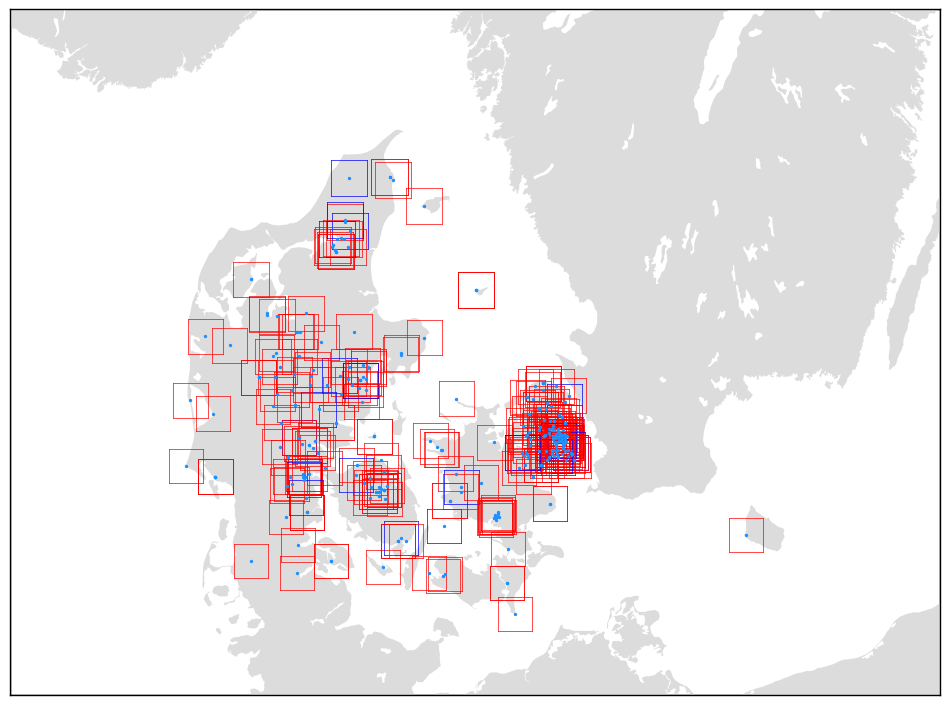

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import math
import random

# Your DataFrame loading and setup code here

# Create a new figure
plt.figure(figsize=(12, 12))

# Define latitude and longitude boundaries for Denmark
llcrnrlat = 54   # lower latitude
urcrnrlat = 58.5     # upper latitude
llcrnrlon = 6      # lower longitude
urcrnrlon = 17     # upper longitude

# Create a Basemap instance focused on Denmark
m = Basemap(projection='merc', llcrnrlat=llcrnrlat, urcrnrlat=urcrnrlat, llcrnrlon=llcrnrlon, urcrnrlon=urcrnrlon, lat_ts=0, resolution='h')

# Draw coastlines, countries, and states
m.drawmapboundary(fill_color='white') 
m.fillcontinents(color='gainsboro',lake_color='white')

# Loop through the data and plot each point, adding a label
for idx, row in station_df.iterrows():
    x, y = m(row['Long'], row['Lat'])
    m.scatter(x, y, marker='o', color='dodgerblue', zorder=5, s=2)

    # Randomly decide to make the square red or green
    color = 'blue' if random.random() < 1/10 else 'red'  # 1/3 chance to be green

    # Calculate offsets for the square
    lat_offset = 12.8 / 111  # 12.8 km in degrees latitude
    lon_offset = 12.8 / (111 * math.cos(math.radians(row['Lat'])))  # 12.8 km in degrees longitude

    # Calculate corner points of the square in degrees
    lower_left = m(row['Long'] - lon_offset, row['Lat'] - lat_offset)
    upper_left = m(row['Long'] - lon_offset, row['Lat'] + lat_offset)
    upper_right = m(row['Long'] + lon_offset, row['Lat'] + lat_offset)
    lower_right = m(row['Long'] + lon_offset, row['Lat'] - lat_offset)

    # Plot square with the randomly chosen color
    sides = [[lower_left, upper_left], [upper_left, upper_right], [upper_right, lower_right], [lower_right, lower_left]]
    for side in sides:
        m.plot([side[0][0], side[1][0]], [side[0][1], side[1][1]], color=color, linewidth=0.5)

plt.show()
